In [16]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np 

In [10]:
df = pd.read_csv('annual_beef_data.csv')
df.head()

,Year,Consumption,Production,Export,Population,Fuel_Price,Cattle Slaughtered,Beef_Price
0,1961,45340550.43,144539000,74700000,2828481,1.8,640100,40.35
1,1962,47745205.84,125689000,59800000,2835226,1.8,585600,41.56
2,1963,50934601.11,129513000,61700000,2847099,1.8,598900,42.80
3,1964,50009860.48,112798000,52700000,2860976,1.8,488500,44.09
4,1965,49876235.85,112943000,55000000,2874711,1.8,490700,45.41


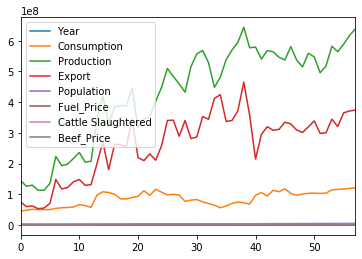

In [11]:
df.plot()

In [12]:
df_Beef_Price = df.filter(['Fuel_Price'])
dataset = df_Beef_Price.values #this converts in array
dataset

array([[  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  2.24],
       [  2.48],
       [  3.29],
       [ 11.58],
       [ 11.53],
       [ 12.8 ],
       [ 13.92],
       [ 14.02],
       [ 31.61],
       [ 36.83],
       [ 35.93],
       [ 32.97],
       [ 29.55],
       [ 28.78],
       [ 27.56],
       [ 14.43],
       [ 18.44],
       [ 14.92],
       [ 18.23],
       [ 23.73],
       [ 20.  ],
       [ 19.32],
       [ 16.97],
       [ 15.82],
       [ 17.02],
       [ 20.67],
       [ 19.09],
       [ 12.72],
       [ 17.97],
       [ 28.5 ],
       [ 24.44],
       [ 25.02],
       [ 28.83],
       [ 38.27],
       [ 54.52],
       [ 65.14],
       [ 72.39],
       [ 97.26],
       [ 61.67],
       [ 79.5 ],
       [111.26],
       [111.67],
       [108.66],
       [ 98.95],
       [ 54.4 ],
       [ 46.  ],
       [ 55.71],
       [ 71.64]])

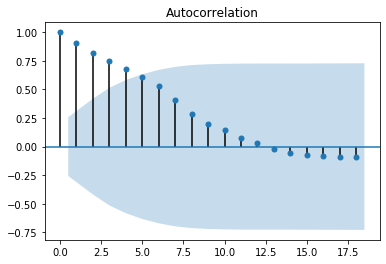

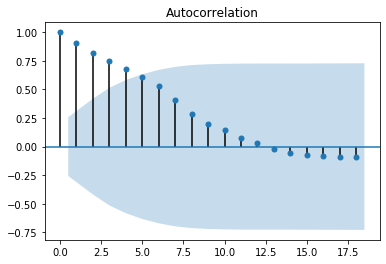

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset)

In [19]:
df_Beef_Price.head()

,Fuel_Price
0,1.8
1,1.8
2,1.8
3,1.8
4,1.8


In [20]:
df_Beef_Price.shift(1)

,Fuel_Price
0,NaN
1,1.80
2,1.80
3,1.80
4,1.80
5,1.80
6,1.80
7,1.80
8,1.80
9,1.80


In [21]:
sales_diff = df_Beef_Price.diff(periods=1)

In [22]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Fuel_Price
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


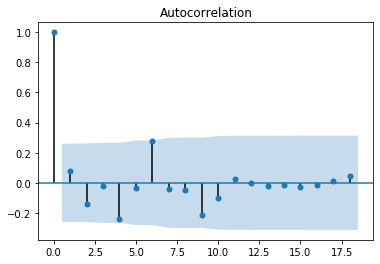

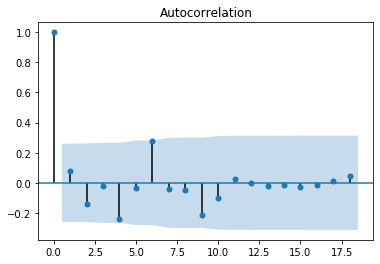

In [23]:
plot_acf(sales_diff)

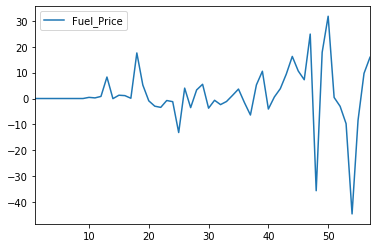

In [24]:
sales_diff.plot()

In [40]:
X = df_Beef_Price.values
train = X[0:47] # 27 data as train data
test = X[47:]  # 9 data as test data
predictions = []

In [41]:
train.size

47

In [42]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()


In [43]:
predictions = model_ar_fit.predict(start=47,end=58)
predictions

array([79.23263731, 84.59561539, 91.38362824, 94.56883825, 93.91218337,
       93.44992635, 92.34758366, 91.84652434, 91.04043864, 88.71732741,
       87.42220459, 86.96944079])

In [44]:
test

array([[ 97.26],
       [ 61.67],
       [ 79.5 ],
       [111.26],
       [111.67],
       [108.66],
       [ 98.95],
       [ 54.4 ],
       [ 46.  ],
       [ 55.71],
       [ 71.64]])

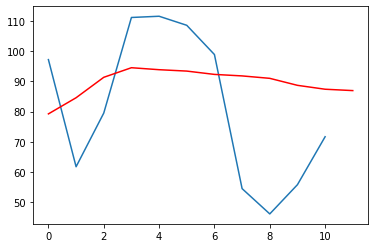

In [45]:
plt.plot(test)
plt.plot(predictions,color='red')

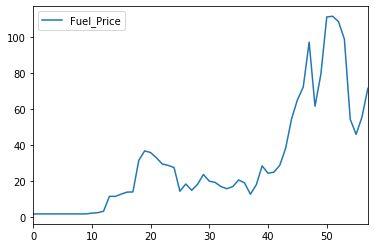

In [31]:
df_Beef_Price.plot()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [106]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 398.5990364806834
(0, 0, 1) 355.2842460288638
(0, 0, 4) 314.42486288511043
(0, 0, 5) 313.5093357770419
(0, 1, 0) 289.4249907633358
(0, 1, 1) 287.7008307505271
(0, 1, 2) 289.62513625262204
(0, 1, 3) 290.99167411029015
(0, 1, 4) 291.7963177699635
(0, 1, 5) 292.08095231185166
(0, 1, 7) 290.3998950024818
(0, 1, 8) 291.27227146260884
(0, 2, 0) 299.39519979451455
(0, 2, 1) 284.7587443848899
(0, 2, 2) 285.77894727608026
(1, 0, 0) 304.44560598462783
(1, 0, 5) 304.7013968112427
(1, 1, 0) 287.48355308348374
(1, 1, 1) 289.47071837626163
(1, 2, 0) 294.6028970286709
(1, 2, 1) 285.64187421260164
(1, 2, 2) 287.7682961383819
(1, 2, 3) 289.24470979891714
(1, 2, 4) 290.5422126789368
(1, 2, 5) 291.5271028893448
(1, 2, 6) 291.2001051054989
(1, 2, 7) 289.75905110876727
(2, 0, 0) 300.3492621274363
(2, 1, 0) 289.47550465594026
(2, 1, 1) 290.47807336545725
(2, 1, 2) 292.53859734686006
(2, 1, 3) 291.45768814372536
(2, 2, 0) 291.09311504944213
(2, 2, 1) 287.635661457521
(2, 2, 2) 288.9527235963013
(2,

In [103]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(0, 2, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

284.7587443848899


In [104]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([ 80.52975991,  88.85644963,  97.37006915, 106.07061847,
       114.9580976 , 124.03250653, 133.29384527, 142.74211381,
       152.37731215, 162.1994403 ])

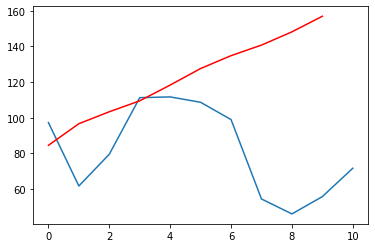

In [102]:
plt.plot(test)
plt.plot(predictions,color='red')